## Homework Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [3]:
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.

The system of equations is given by:

\begin{eqnarray}
f_1(x_1, x_2) &: x_{1}^2 + x_{1}x_{2} - 10 = 0 \\
f_2(x_1, x_2) &: x_{2} + 3x_{1}x_{2}^2 - 57 = 0
\end{eqnarray}

The partial derivatives of these equations are:
\begin{eqnarray}
\frac{\partial f_1}{\partial x_1} &= 2x_{1} + x_{2} \\
\frac{\partial f_1}{\partial x_2} &= x_{1}\\
\frac{\partial f_2}{\partial x_1} &= 3x_{2}^2 \\
\frac{\partial f_2}{\partial x_2} &= 1 + 6x_{1}x_{2}
\end{eqnarray}

Text(0.5, 1.0, 'Graph of the Equations.')

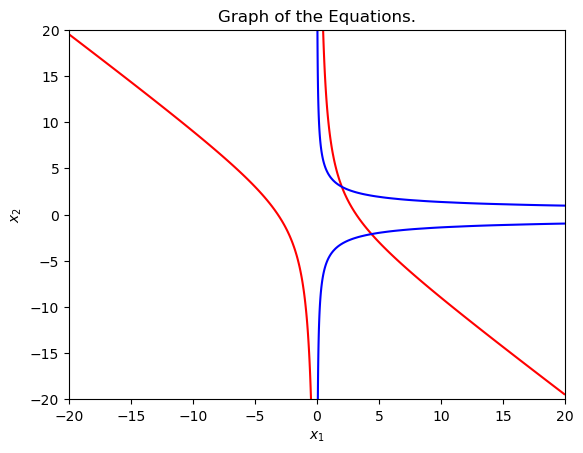

In [55]:
#As we saw in the class, always is a good a idea to draw the functions first 

#Draw graphics to roughly determine x1 and x2

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def f1(x1, x2):
    return x1**2 + x1*x2 - 10

def f2(x1, x2):
    return x2 + 3*x1*(x2**2) - 57


x1 = np.linspace(-20, 20, 200)
x2 = np.linspace(-20, 20, 200)
X1, X2 = np.meshgrid(x1, x2)

Z1 = f1(X1, X2)
Z2 = f2(X1, X2)


contour1 = plt.contour(X1, X2, Z1, levels=[0], colors='r')
contour2 = plt.contour(X1, X2, Z2, levels=[0], colors='b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Graph of the Equations.')


In [56]:
#Now we can apply the Newton-Raphson method using a two initial guess

eps = 1.e-8
nmax=100



# Define the partial derivatives
def f1x1(x1, x2):
    return 2*x1 + x2

def f1x2(x1, x2):
    return x1

def f2x1(x1, x2):
    return 3*x2**2

def f2x2(x1, x2):
    return 1 + 6*x1*x2

def dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    a1 = f1x1(x1,x2)
    b1 = f1x2(x1,x2)
    c1 = f2x1(x1,x2)
    d1 = f2x2(x1,x2)
    return (b1*f2(x1,x2) - d1*f1(x1,x2)) / (a1*d1-b1*c1)

def dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2):
    a2 = f1x1(x1,x2)
    b2 = f1x2(x1,x2)
    c2 = f2x1(x1,x2)
    d2 = f2x2(x1,x2)
    return (c2*f1(x1,x2) - a2*f2(x1,x2)) / (a2*d2 - b2*c2)

#Initial guess 1
x1= 1
x2= 1

for i in range(nmax):
    x1=x1+dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    x2=x2+dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    
    if abs(f1(x1, x2)) < eps and abs(f2(x1, x2)) < eps:
        break  
        
print(f'Solution found: x1 = {x1}, x2 = {x2}, after {i+1} iterations')



Solution found: x1 = 2.0, x2 = 3.0000000000000004, after 7 iterations


In [58]:
#Initial guess 2
x1= 5
x2= -2

for i in range(nmax):
    x1=x1+dx1(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    x2=x2+dx2(f1,f2,f1x1,f1x2,f2x1,f2x2,x1,x2)
    
    if abs(f1(x1, x2)) < eps and abs(f2(x1, x2)) < eps:
        break  
        
print(f'Solution found: x1 = {x1}, x2 = {x2}, after {i+1} iterations')


Solution found: x1 = 4.393744193288599, x2 = -2.1177810147141836, after 4 iterations
